<span>
<b>Authors:</b> 
<a href="http://------">Ornela Danushi </a>
<a href="http://------">Gerlando Gramaglia </a>
<a href="http://------">Domenico Profumo </a><br/>
<b>Python version:</b>  3.x<br/>
</span>

# Data Understanding & Preparation on Tennis Matches dataset 
Explore the dataset by studying the data quality, their distribution among several different features and the correlations.

The **central component** of the data science toolkit is **Pandas library** is a and it is used in conjunction with other libraries in that collection. Pandas is built on top of the **NumPy package**, meaning a lot of the structure of NumPy is used or replicated in Pandas. Data in pandas is often used to feed statistical analysis in **SciPy**, plotting functions from **Matplotlib**, and machine learning algorithms in Scikit-learn.

**Install Pandas**

Pandas is an easy package to install. Open up your terminal program (for Mac users) or command line (for PC users) and install it using either of the following commands: **conda install pandas OR pip install pandas.**

Alternatively, if you're using Jupyter notebook you can run a cell with: **!pip install pandas**

In [2]:
import pandas as pd
import math
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
from collections import defaultdict
from scipy.stats.stats import pearsonr

In [ ]:
#df.dtypes #return the type of each attribute but is already included in the df.info() called later

# Types of Attributes and basic checks 
## Data Quality with reference to Syntactic Accuracy

Check the data integrity, that is whether there are any empty cells or corrupted data. 
We will use for this purpose the Pandas function **info()**, which checks if there is any 
null value in any column. This function also checks data type for each column, as well as 
number of each data types and number of observations (rows).

Moreover we check if each attribute is syntactically correct according to the specifications

In [4]:
df = pd.read_csv('matches_with_gender.csv', index_col = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186128 entries, 0 to 186127
Data columns (total 51 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tourney_id          186073 non-null  object 
 1   tourney_name        186103 non-null  object 
 2   surface             185940 non-null  object 
 3   draw_size           186099 non-null  float64
 4   tourney_level       186099 non-null  object 
 5   tourney_date        186100 non-null  float64
 6   match_num           186101 non-null  float64
 7   winner_id           186073 non-null  float64
 8   winner_entry        25827 non-null   object 
 9   winner_name         186101 non-null  object 
 10  winner_hand         186082 non-null  object 
 11  winner_ht           49341 non-null   float64
 12  winner_ioc          186099 non-null  object 
 13  winner_age          183275 non-null  float64
 14  loser_id            186100 non-null  float64
 15  loser_entry         44154 non-null

## Classification of Data Domain

We split our dataset in 3 subsets for commodity, just to vizualise the attributes in a more clear way.

### Tourney

     - *tourney_id* - ***object*** 
     - *tourney_name* - ***object*** 
     - *tourney_level* - ***object***
     - *tourney_spectators* - ***float64*** 
     - *tourney_revenue* - ***float64***
    
 ### Matches
 
     - *match_num*- ***float64***
     - *surface* - ***object***
     - *draw_size* - ***float64*** => ***int64*** 
     - *tourney_date* - ***float64*** => ***Datetime64***
     - *minutes* - ***float64*** 
     - *score* - ***object***
     - *round* - ***object** 
     - *best_of* - ***float64***

 ### Players
 
    - *winner_id*- ***float64***           - *loser_id*- ***float64*** 
    - *winner_name* - ***object***         - *loser_name* - ***object***
    - *winner_ioc* - ***object***          - *loser_ioc* - ***object*** 
    - *winner_ht*- ***float64***           - *loser_ht*- ***float64*** 
    - *winner_age*- ***float64***          - *loser_age*- ***float64*** 
    - *winner_hand* - ***object***         - *loser_hand* - ***object***
    - *winner_entry* - ***object***        - *loser_entry* - ***object***
    - *winner_rank* - ***float64***        - *loser_rank* - ***float64***
    - *winner_rank_points* - ***float64*** - *loser_rank_points* - ***float64***
    - *w_ace* - ***float64***              - *l_ace* - ***float64***
    - *w_df* - ***float64***               - *l_df* - ***float64***
    - *w_svpt* - ***float64***             - *l_svpt* - ***float64***
    - *w_1stIn* - ***float64***            - *l_1stIn* - ***float64***
    - *w_1stWon* - ***float64***           - *l_1stWon* - ***float64***
    - *w_2ndWon* - ***float64***           - *l_2ndWon* - ***float64***
    - *w_SvGms* - ***float64***            - *l_SvGms* - ***float64***
    - *w_bpSaved* - ***float64***          - *l_bpSaved* - ***float64***
    - *w_bpFaced* - ***float64***          - *l_bpFaced* - ***float64*** 
    - *winner_gender* - ***object***      - *loser_gender* - ***object*** 
 

## Data Statistics and Data Distributions

The pandas function describe() is used to obtain basic statistical notions. By specifying the include attribute as 'all' we get statistics both for the numerical and categorical attributes of the dataset.

The pandas function memory_usage() returns a Pandas Series having the memory usage of each column (in bytes) in a Pandas DataFrame. By specifying the deep attribute as True, we can get to know the actual space being taken by each column.

The pandas function unique() is used to obtain the values of composition. By which we can view NaN, empty values .. from the acceptable ones, where this can help to understand something more.

In [5]:
pd.options.display.float_format = '{:.2f}'.format # to visualize data through a table

df.describe(include='all') # a summary of statistical informations

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_entry,winner_name,...,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_spectators,tourney_revenue,winner_gender,loser_gender
count,186073,186103,185940,186099.00,186099,186100.00,186101.00,186073.00,25827,186101,...,82311.00,82306.00,166719.00,166701.00,150845.00,150828.00,186101.00,186102.00,183424,183999
unique,4853,2488,4,NaN,19,NaN,NaN,NaN,15,6180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3
top,2016-560,W15 Antalya,Hard,NaN,15,NaN,NaN,NaN,Q,Novak Djokovic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,F
freq,478,4634,95243,NaN,45807,NaN,NaN,NaN,13575,289,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125314,125287
mean,NaN,NaN,NaN,41.04,NaN,20182851.75,160.63,180151.62,NaN,NaN,...,4.66,8.87,383.81,470.45,434.30,356.33,4108.57,822644.20,NaN,NaN
std,NaN,NaN,NaN,25.35,NaN,16078.21,289.33,46547.17,NaN,NaN,...,3.15,3.97,314.00,1041.01,355.80,702.63,2707.04,600857.05,NaN,NaN
min,NaN,NaN,NaN,2.00,NaN,20160104.00,1.00,100644.00,NaN,NaN,...,0.00,0.00,1.00,1.00,1.00,1.00,91.00,17865.74,NaN,NaN
25%,NaN,NaN,NaN,32.00,NaN,20170515.00,17.00,122425.00,NaN,NaN,...,2.00,6.00,137.00,49.00,157.00,35.00,2836.00,547366.24,NaN,NaN
50%,NaN,NaN,NaN,32.00,NaN,20180827.00,131.00,203530.00,NaN,NaN,...,4.00,8.00,298.00,161.00,325.00,138.00,3340.00,663329.71,NaN,NaN
75%,NaN,NaN,NaN,32.00,NaN,20191007.00,272.00,214152.00,NaN,NaN,...,6.00,11.00,562.00,438.00,642.00,377.00,4008.00,834029.00,NaN,NaN


In [6]:
df.memory_usage(deep=True)

Index                  1489024
tourney_id            13773860
tourney_name          12902923
surface               11361062
draw_size              1489024
tourney_level         10899509
tourney_date           1489024
match_num              1489024
winner_id              1489024
winner_entry           6640780
winner_name           13375073
winner_hand           10794228
winner_ht              1489024
winner_ioc            11166868
winner_age             1489024
loser_id               1489024
loser_entry            7129461
loser_name            13371024
loser_hand            10792876
loser_ht               1489024
loser_ioc             11166952
loser_age              1489024
score                 12301540
best_of                1489024
round                 11086531
minutes                1489024
w_ace                  1489024
w_df                   1489024
w_svpt                 1489024
w_1stIn                1489024
w_1stWon               1489024
w_2ndWon               1489024
w_SvGms 

We see a lot of data provided by the functions above and this cannot help us to deduce something in an immediate way. So we apply again them to a subset of items, we show first the categorical ones and then the numerical ones.

### Tourney
○ tourney_id: is the id of the tourney, has to be unique, is built with the first 4 characters that identify the year while the remaining part is random

Analysis: 
Split the value of the attribute in 2 parts, the first with 4 characters and the second with the remaing characters. For both the parts build a set inserting each different year and id. 
Count how many wrong years are inserted through a NaN value. To detect the wrong remaining part is more difficult since they are random and don't follow a known a structure. We can only conclude that the wrong id elements are those deriving from the wrong years. As is shown with a different graph later, those years correspond also to the years of the tourney_date values.

○ tourney_name: is the name of the tourney

Analysis: 
since the tourney_name's unique values are < tourney_id's unique values then we have more tourney_ids with the same tourney_names. The tourney_ids are quite the double of the tourney_names

○ tourney_level: is the level of the tourney, it distinguishes if it can be played by men, womens or both

Analysis: 
About this type of attribute we know that: 

men: 'G' = Grand Slams, 'M' = Masters 1000s, 'A' = other tour-level events, 'C' = Challengers, 'S' = Satellites/ITFs, 'F' = Tour finals and other season-ending events, 'D' = Davis Cup. F

women: several additional tourney_level codes, including 'P' = Premier, 'PM' = Premier Mandatory, 'I' = International. The various levels of ITFs are given by the prize money (in thousands), such as '15' = ITF $15,000. Other codes, such as 'T1' for Tier I (and so on) are used for older WTA tournament designations. 'D' is used for the Federation/Fed/Billie Jean King Cup, and also for the Wightman Cup and Bonne Bell Cup.

both: 'E' = exhibition (events not sanctioned by the tour, though the definitions can be ambiguous), 'J' = juniors, and 'T' = team tennis, which does yet appear anywhere in the dataset but will at some point.

it is an attribute that depends on the gender of the player, so we have to underline their relations.
By the graph we conclude that there are some errors due to the 'U' gender that have to be fixed and are treated better in the 'handling of missing values' part.
The good thing is that, as we can see, the majority of the matches have been played only between the same gender and so a consideration to be done is that of considering the 'U' value the same of the other member of the couple in which it appears; if the other value is 'M' and there is a 'U' then that 'U' has to be transformed in 'M', and vice versa. Considering also the fact that the tourney_level can be applied to that gender, otherwise also the known value has to be exchanged. Also by the graph we can see the distribution of levels according the gender of the players, and so i.e. the 'C' between the man.

In [14]:
df[['tourney_id', 'tourney_name', 'tourney_level']].describe()

,tourney_id,tourney_name,tourney_level
count,186073,186103,186099
unique,4853,2488,19
top,2020-580,W15 Antalya,15
freq,478,4634,45807


In [ ]:
tourney_year= df['tourney_id'].str[:4]
tourney_id= df['tourney_id'].str[5:]

tourney_year_set= set()
wrong_year= 0
for i in tourney_year:    
    if math.isnan(float(i)):
        wrong_year += 1
    else:
        tourney_year_set.add(i)
print("Present years: "+ str(sorted(tourney_year_set))) 
print("Wrong years counting: "+ str(wrong_year))

In [61]:
df.tourney_level.unique()

array(['A', 'P', 'G', 'I', 'M', 'PM', 'F', 'D', 'C', '15', '25', '60',
       '100', '80', '10', '50', '75', 'O', 'W', nan], dtype=object)

<AxesSubplot:title={'center':'Distribution of tourney_level values according to the gender of the player'}, xlabel='Gender of the winner and loser player', ylabel='Counting'>

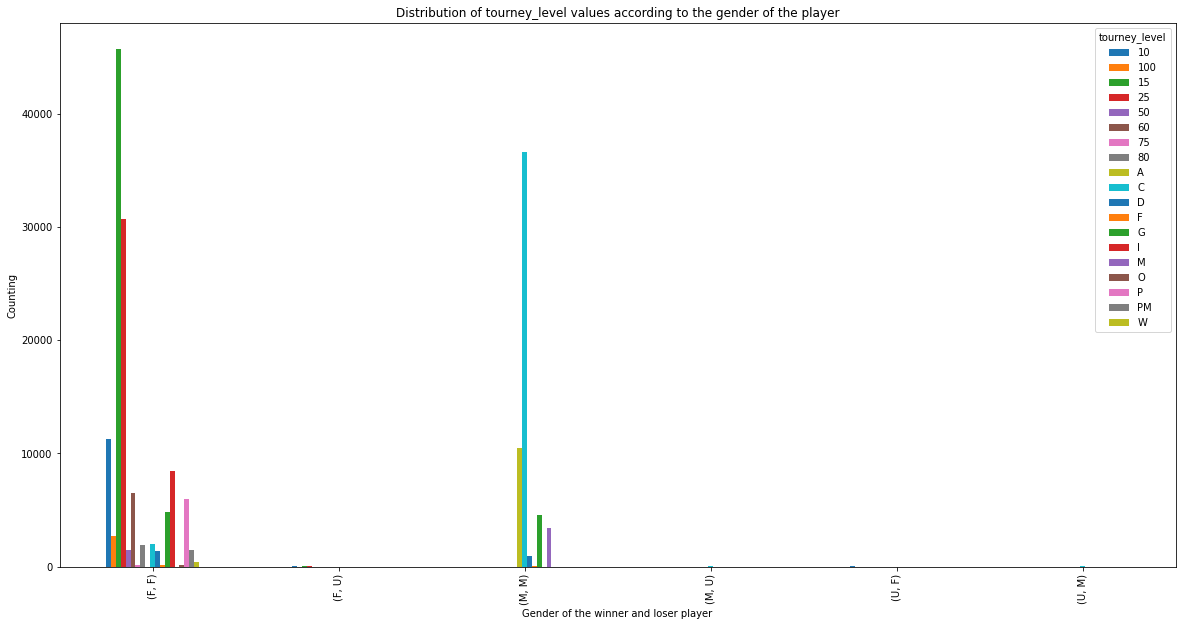

In [7]:
lf = df.groupby(['winner_gender', 'loser_gender', 'tourney_level']).size()
lf = lf.unstack()
lf.plot(
    figsize=(20, 10), 
    title="Distribution of tourney_level values according to the gender of the player", 
    xlabel="Gender of the winner and loser player",
    ylabel="Counting",
    kind='bar')

### Tourney

○ tourney_spectators: is the number of people watching for a match

○ tourney_revenue: is the amount of money earned

Analysis: 
We see their distribution and notice that they have a quite similar behavior. 
we could treat usefully these data by supposing for instance, an approximation of the cost of a ticket through the division of the avg revenue with the avg number of spectators

Another observation that we can do, but that is general with viewing the statistics of numerical data is the fact that we have the min and/or max value which are very different from the mean value, and for this we assume to have outliers, for sure.

In [12]:
df[['tourney_spectators', 'tourney_revenue']].describe()

,tourney_spectators,tourney_revenue
count,186101.00,186102.00
mean,4108.57,822644.20
std,2707.04,600857.05
min,91.00,17865.74
25%,2836.00,547366.24
50%,3340.00,663329.71
75%,4008.00,834029.00
max,18086.00,5002793.97


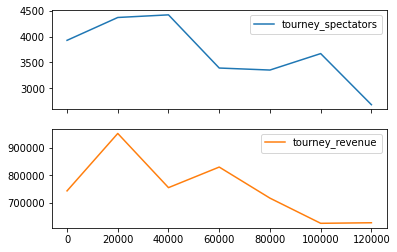

In [8]:
dl = pd.DataFrame({ 'tourney_spectators': df['tourney_spectators'], 'tourney_revenue': df['tourney_revenue']}, index=[0, 20000, 40000, 60000, 80000, 100000, 120000])
lines = dl.plot.line(subplots=True)

In [9]:
df.tourney_revenue.mean() / df.tourney_spectators.mean()

200.22644566259393

### Matches
○ surface: kind of surface for the match

Analysis: 
We see more deeply this attribute since has few different values. Moreover, to understand which type of surfaces has been used in the matches we put it in relations the years of the tourney_date values. Thanks to the visualization of their distribution we can conclude that they follow the same increasing way instead for the last year, denoted by 2021, there is an inversion of the 'Clay' with the 'Hard' surface type.

○ score: 

○ round

In [10]:
df[['surface', 'score', 'round']].describe()

,surface,score,round
count,185940,185929,186098
unique,4,9705,12
top,Hard,6-3 6-4,R32
freq,95243,5377,63069


In [8]:
df.surface.unique()

array(['Hard', 'Clay', 'Grass', 'Carpet', nan], dtype=object)

<AxesSubplot:title={'center':'Distribution of the surface values according to the years of the tourney_date values'}>

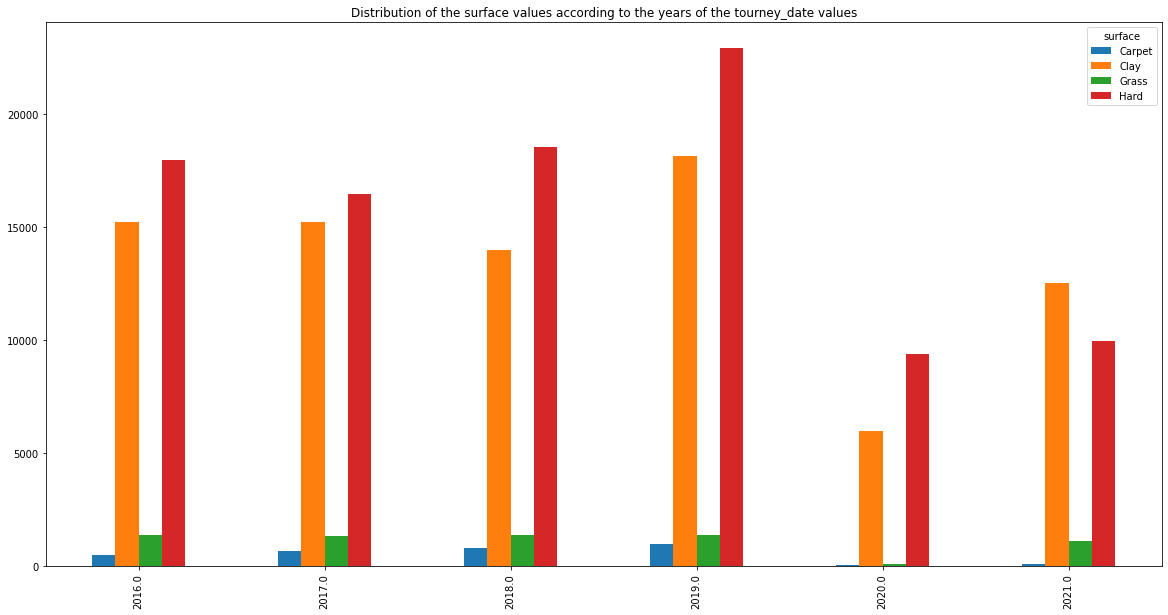

In [17]:
#----------------- TO MOVE IN THE CONVERSION PART
#df['tourney_date'] = pd.to_datetime(df['tourney_date'], format='%Y%m%d') or the following
#df['tourney_date'] = pd.to_datetime(df['tourney_date'], format='%Y-%m-%d')
#df['tourney_date'] = [x.date() for x in df.tourney_date]
# dopo questa conversione, la describe della data va fatta separatamente
#-----------------

lf = df.groupby([ [x.year for x in df.tourney_date], 'surface']).size()
lf = lf.unstack()
lf.plot(
    figsize=(20, 10), 
    title="Distribution of the surface values according to the years of the tourney_date values", 
    kind='bar')

In [10]:
print(df['round'].unique())
print("null values:",  df['surface'].isnull().sum()) #VA LASCIATO O TOLTO? E' NELLA PARTE DI CONTROLLO DELLA SINTASSI.

['F' 'SF' 'QF' 'R16' 'R32' 'Q1' 'Q2' 'Q3' 'R64' 'R128' 'RR' 'BR' nan]
null values: 188


### Matches

○ match_num: a match-specific identifier. Often starting from 1, sometimes counting down from 300, and sometimes arbitrary.

○ draw_size: number of players in the draw, often rounded up to the nearest power of 2. (i.e., a tournament with 28 players may be shown as 32)

○ tourney_date: tourney_date: eight digits, YYYYMMDD, usually the Monday of the tournament week.

Analysis:
According to the distribution of the matches through the months and the years we can note that they follow the same structure for the first 4 years, while for the last 2 they have more missing values. In those years we can say that July was the month with more matches played.

○ minutes: match length, where available

Analysis:
According to the distribution of the matches duration along the years, we note that there are a lot of matches played with less than 1 hour, 1 hour and some of 2 hours. THe bad thing is that there are also a lot of NaN values, this means that that data was not available for those matches and have to be treated in some way in the 'handling the missing values' part.

○ best_of: '3' or '5', indicating the number of set for this match

Analysis:
We note that the majority is the same for all the years, and so we could souppose for the missing values that will take the most used value too, which is the 3.

In [11]:
df[['match_num', 'draw_size', 'minutes', 'best_of']].describe()

,match_num,draw_size,minutes,best_of
count,186101.00,186099.00,81660.00,186099.00
mean,160.63,41.04,97.68,3.03
std,289.33,25.35,41.49,0.26
min,1.00,2.00,0.00,3.00
25%,17.00,32.00,72.00,3.00
50%,131.00,32.00,91.00,3.00
75%,272.00,32.00,119.00,3.00
max,8312.00,128.00,4756.00,5.00


In [16]:
df[['tourney_date']].describe()

,tourney_date
count,186100
unique,375
top,2019-08-26
freq,1440


<AxesSubplot:title={'center':'Distribution of the matches according the months of the years'}>

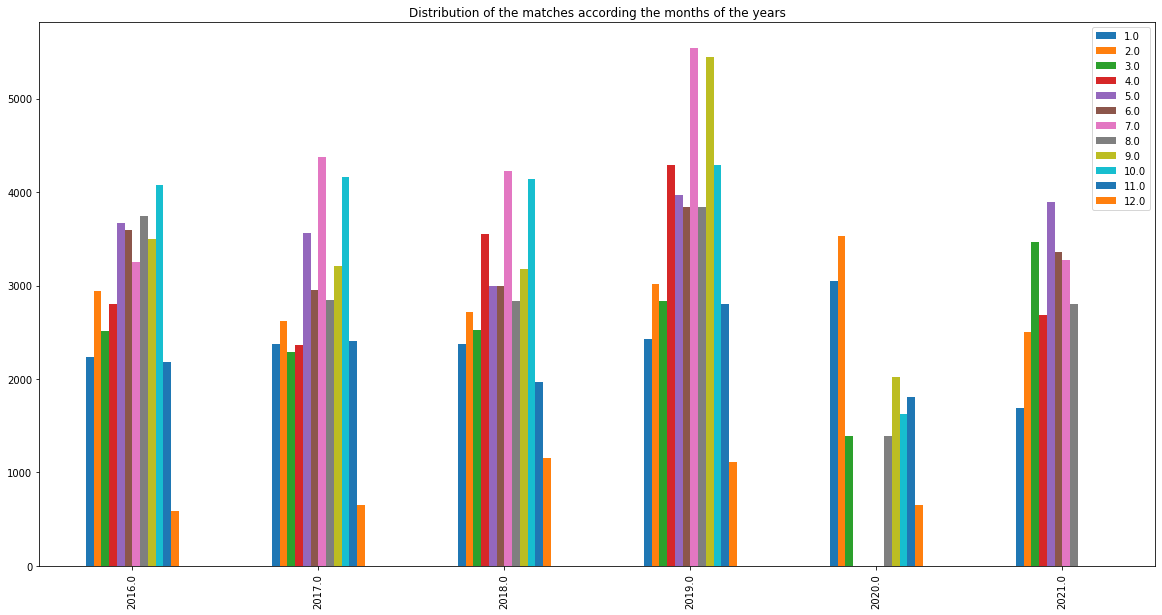

In [21]:
lf = df.groupby([ [x.year for x in df.tourney_date], [x.month for x in df.tourney_date]]).size()
lf = lf.unstack()
lf.plot(
    figsize=(20, 10), 
    title="Distribution of the matches according the months of the years", 
    kind='bar')

<AxesSubplot:title={'center':'Distribution of the duration of the matches during the years'}>

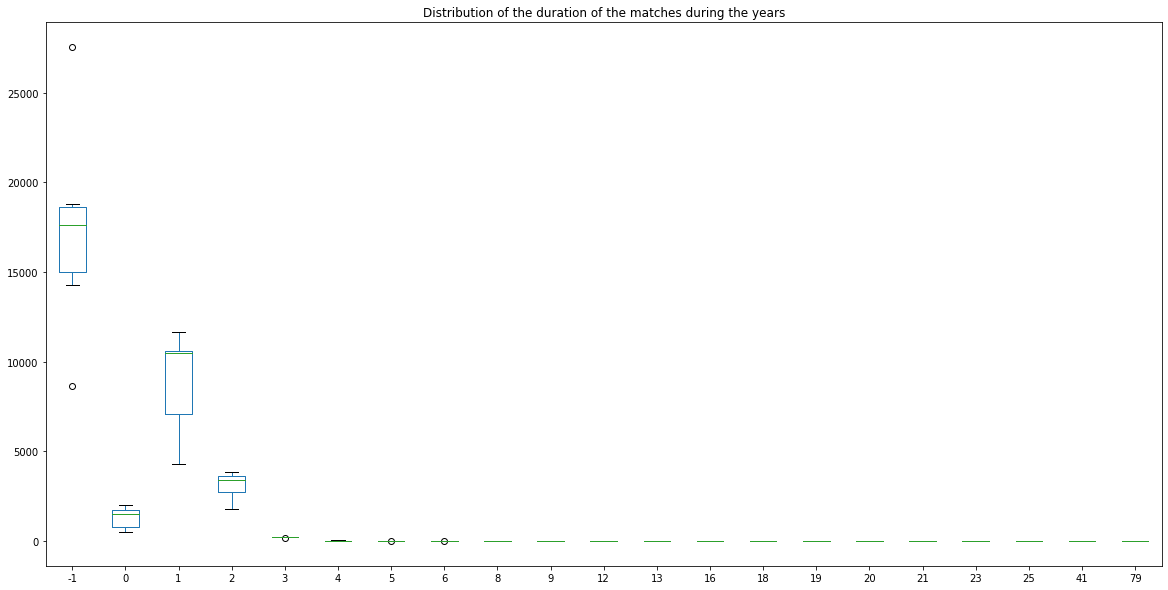

In [53]:
minutes = df['minutes']
minutes = pd.to_numeric(minutes, errors='coerce') #for removing all non-numeric values use to_numeric with parameter errors='coerce' - to replace non-numeric values to NaNs
minutes = minutes.fillna(-1)
minutes = minutes.astype(int) #Last convert values to ints:

lf = df.groupby([ [x.year for x in df.tourney_date], [ int( x // 60) for x in minutes]]).size()
lf = lf.unstack()
lf.plot(
    figsize=(20, 10), 
    title="Distribution of the duration of the matches during the years", 
    kind='box')

<AxesSubplot:title={'center':'Distribution of the duration of the matches during the years'}>

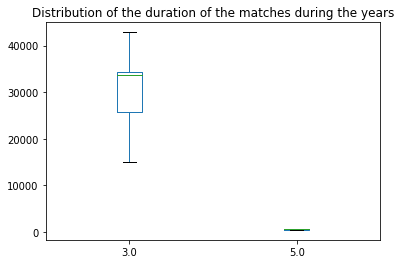

In [59]:
lf = df.groupby([ [x.year for x in df.tourney_date], 'best_of']).size()
lf = lf.unstack()
lf.plot(
    title="Distribution of best_of matches during the years", 
    kind='box')

### Players

○ winner_name, loser_name: name of the player

Analysis: count(winner_name) < count(loser_name) of unique values then this means that the set of winners is smaller than the set of losers

○ winner_ioc, loser_ioc: three-character country code

Analysis: same previous consideration then this means that there are same countries that are never qualified between the winners 
Moreover, by seeing their distribution graph we note they are similar. 

○ winner_hand, loser_hand, winner_gender, loser_gender

Analysis: these attributes behave in the same way, we aspect 3 different values for them
Moreover, by their distribution graph we note that the majority of the players user the R hand, both the men and women players. 

○ winner_entry, loser_entry: 'WC' = wild card, 'Q' = qualifier, 'LL' = lucky loser, 'PR' = protected ranking, 'ITF' = ITF entry, and there are a few others that are occasionally used

Analysis: 
By visualizing their distribution we note that some are present only with the losers and vice versa, some are present only with the winners.
NOTA ?: There is some relation with the ranking of the player to discover

In [62]:
df[['winner_name', 'loser_name', 'winner_ioc', 'loser_ioc', 'winner_hand', 'loser_hand', 'winner_gender', 'loser_gender', 'winner_entry', 'loser_entry']].describe()

,winner_name,loser_name,winner_ioc,loser_ioc,winner_hand,loser_hand,winner_gender,loser_gender,winner_entry,loser_entry
count,186101,186097,186099,186102,186082,186030,183424,183999,25827,44154
unique,6180,10060,124,154,3,3,3,3,15,19
top,Novak Djokovic,Federico Gaio,USA,USA,R,R,F,F,Q,Q
freq,289,180,16464,16728,120610,109264,125314,125287,13575,20346


<AxesSubplot:title={'center':'Distribution of winner_ioc'}, xlabel='winner_ioc'>

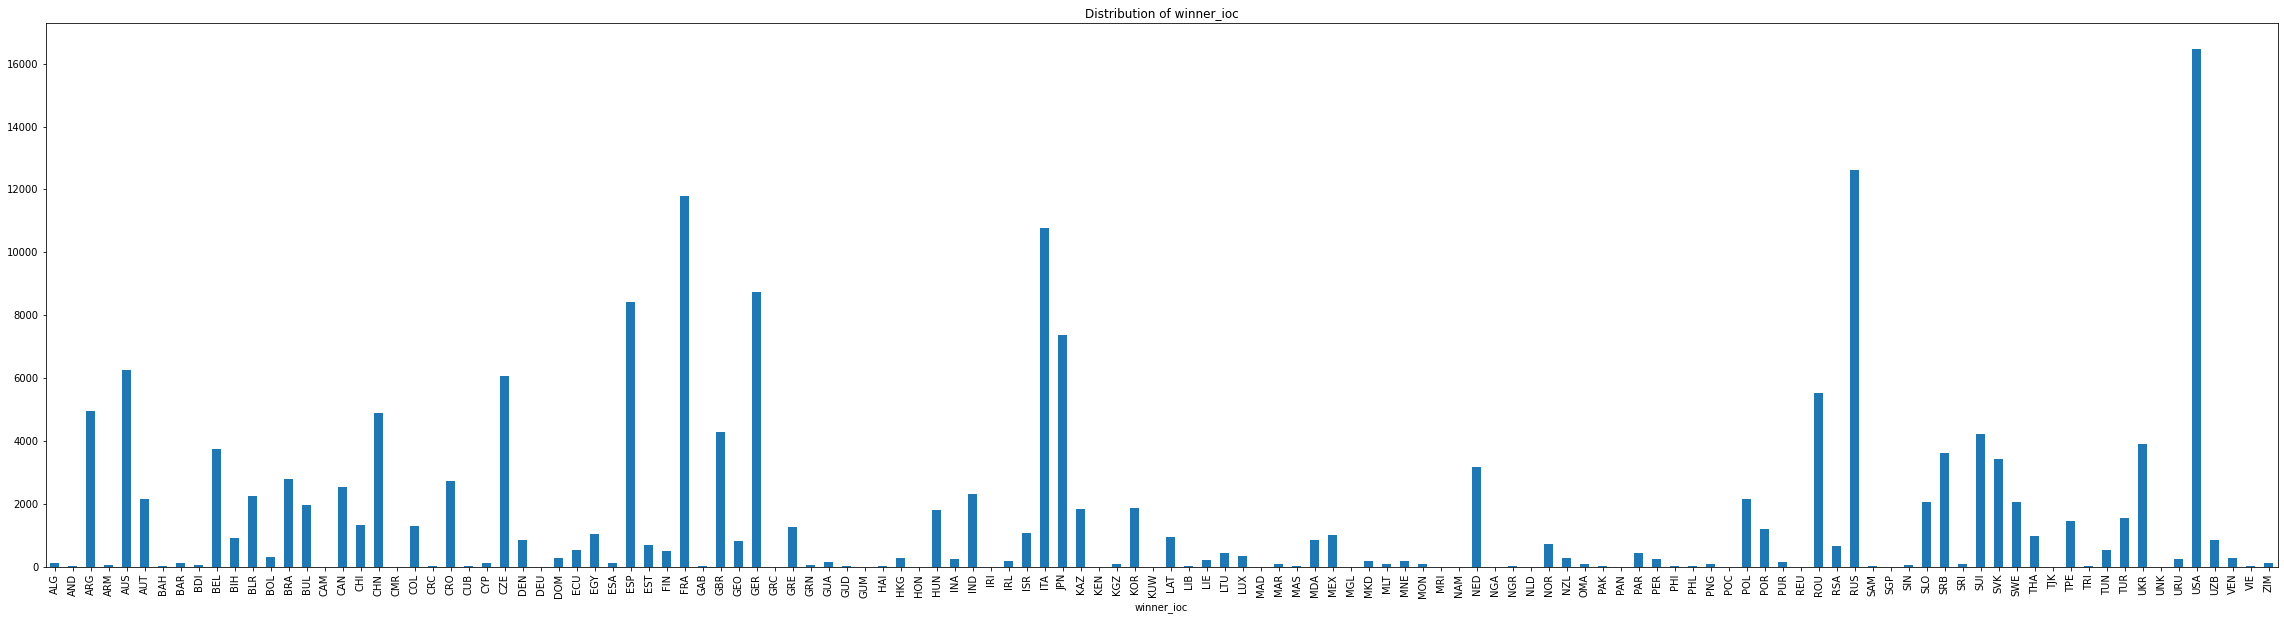

In [85]:
lf = df.groupby([ df.winner_ioc]).size()
lf.plot(
    figsize=(40, 10), 
    title="Distribution of winner_ioc", 
    kind='bar')

<AxesSubplot:title={'center':'Distribution of loser_ioc'}, xlabel='loser_ioc'>

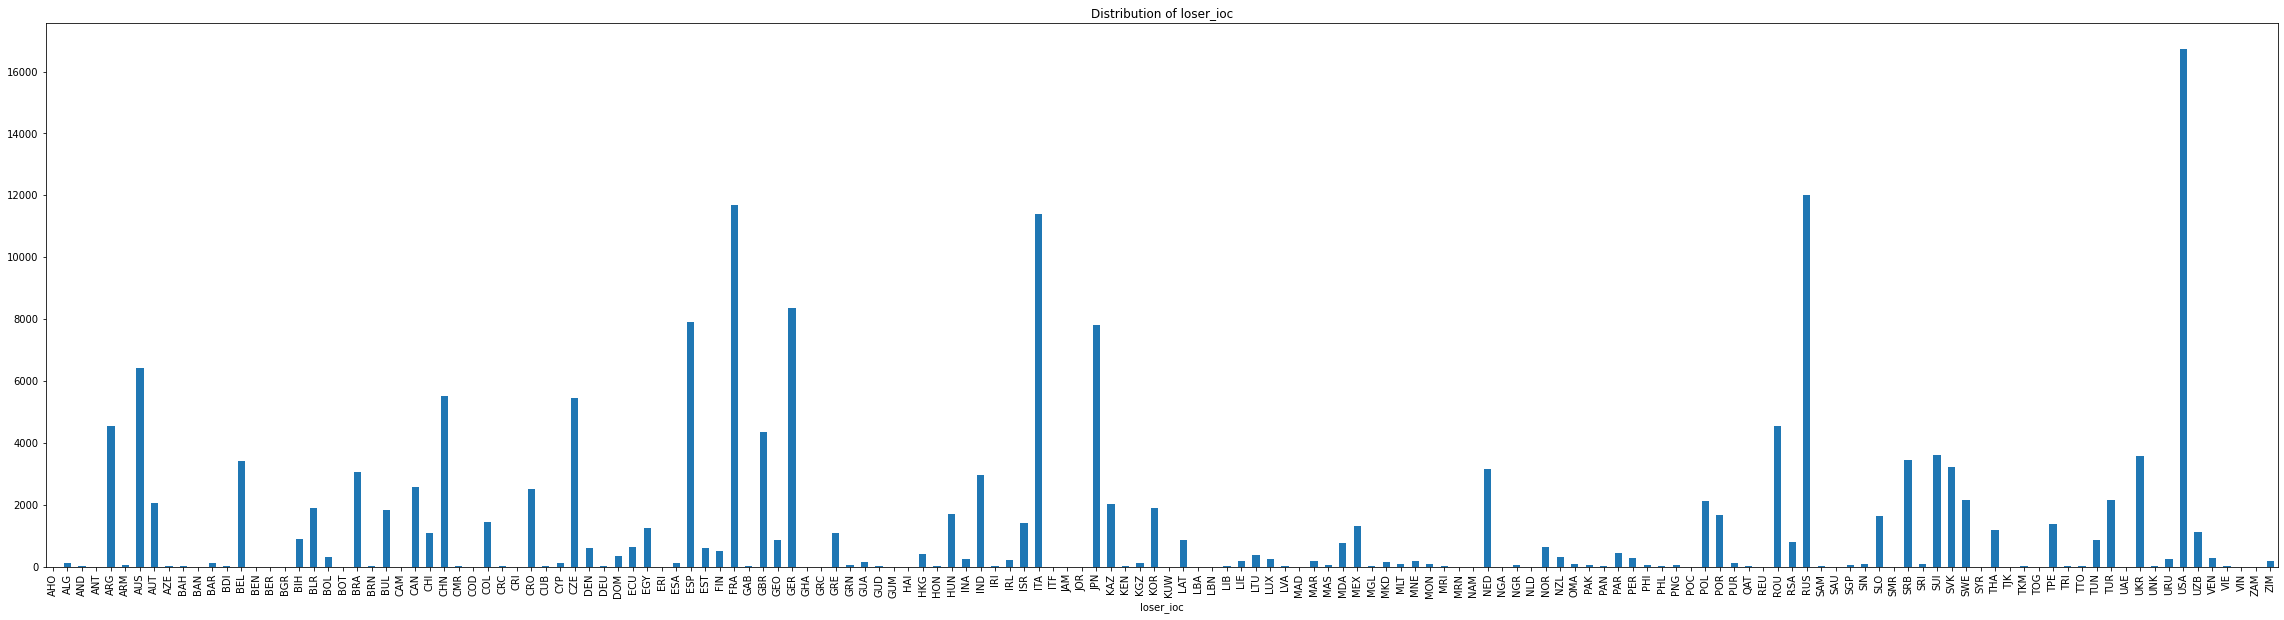

In [86]:
lf = df.groupby([ df.loser_ioc]).size()
lf.plot(
    figsize=(40, 10), 
    title="Distribution of loser_ioc", 
    kind='bar')

<AxesSubplot:title={'center':'Distribution of best_of matches during the years'}, xlabel='winner_hand,loser_hand,winner_gender'>

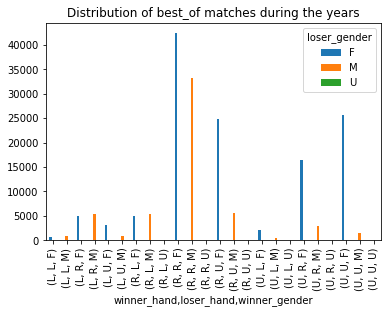

In [88]:
lf = df.groupby([ 'winner_hand', 'loser_hand', 'winner_gender', 'loser_gender']).size()
lf = lf.unstack()
lf.plot(
    title="Distribution of the hand used on matches and their gender", 
    kind='bar')

<AxesSubplot:title={'center':'Distribution of winner_entry'}, xlabel='winner_entry'>

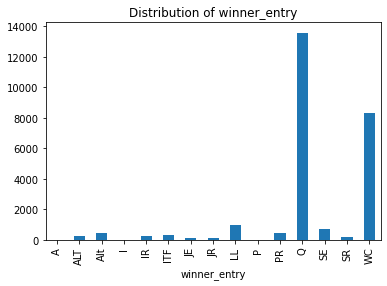

In [119]:
lf = df.groupby([ 'winner_entry']).size()
lf.plot(
    title="Distribution of winner_entry",
    kind='bar')

<AxesSubplot:title={'center':'Distribution of loser_entry'}, xlabel='loser_entry'>

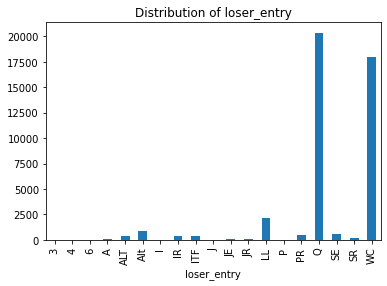

In [120]:
rf = df.groupby([ 'loser_entry']).size()
rf.plot(
    title="Distribution of loser_entry",
    kind='bar')

### Players
○ winner_id, loser_id: id of the player used in the match

NOTA ?: Analysis: we should discover some relation with the id and the player name it refers

○ winner_ht, loser_ht: height in centimetres, where available

○ winner_age, loser_age: the age of the player, in years, depending on the date of the tournament. COSA RAPPRESENTA LA PARTE DECIMALE?

Analysis: the ht and the age are attributes that should have the values inside an interval, the outliers are not only those that are too far from the mean but also from some acceptable values
NOTA: QUESTA DECISIONE È DI COMPETENZA DELLA SINTASSI O DELLA GESTIONE DEI VALORI

○ winner_rank, loser_rank: ATP or WTA rank, as of the tourney_date, or the most recent ranking date before the tourney_date

○ winner_rank_points, loser_rank_points: number of ranking points, where available

Analysis: we should discover some relations between the rank points and the number of aces done

○ w_ace, l_ace: number of aces

○ w_df, l_df: number of double faults


○ w_svpt, l_svpt: number of serve points

○ w_1stIn, l_1stIn: number of first serves made

○ w_1stWon, l_1stWon: number of first-serve points won

○ w_2ndWon, l_2ndWon: number of second-serve points won

○ w_SvGms, l_SvGms: number of serve games

○ w_bpSaved, l_bpSaved: number of breakpoints saved

○ w_bpFaced, l_bpFaced: number of breakpoints faced

In [91]:
df[['winner_id', 'loser_id', 'winner_ht', 'loser_ht', 'winner_age', 'loser_age', 'winner_rank', 'loser_rank', 'winner_rank_points', 'loser_rank_points']].describe()

,winner_id,loser_id,winner_ht,loser_ht,winner_age,loser_age,winner_rank,loser_rank,winner_rank_points,loser_rank_points
count,186073.00,186100.00,49341.00,38348.00,183275.00,179590.00,166719.00,150845.00,166701.00,150828.00
mean,180151.62,181662.42,181.41,181.56,23.96,23.77,383.81,434.30,470.45,356.33
std,46547.17,46618.08,11.63,10.82,4.46,4.63,314.00,355.80,1041.01,702.63
min,100644.00,100644.00,2.00,2.00,14.04,14.01,1.00,1.00,1.00,1.00
25%,122425.00,124116.00,175.00,175.00,20.49,20.13,137.00,157.00,49.00,35.00
50%,203530.00,205815.00,183.00,183.00,23.46,23.23,298.00,325.00,161.00,138.00
75%,214152.00,214818.00,188.00,188.00,26.87,26.77,562.00,642.00,438.00,377.00
max,245099.00,245099.00,211.00,211.00,95.00,74.49,2220.00,2257.00,16950.00,16950.00


In [92]:
df[['w_svpt', 'l_svpt', 'w_1stIn', 'l_1stIn', 'w_1stWon', 'l_1stWon', 'w_2ndWon', 'l_2ndWon', 'w_SvGms', 'l_SvGms', 'w_bpSaved', 'l_bpSaved', 'w_bpFaced', 'l_bpFaced', 'w_ace', 'l_ace', 'w_df', 'l_df']].describe()

,w_svpt,l_svpt,w_1stIn,l_1stIn,w_1stWon,l_1stWon,w_2ndWon,l_2ndWon,w_SvGms,l_SvGms,w_bpSaved,l_bpSaved,w_bpFaced,l_bpFaced,w_ace,l_ace,w_df,l_df
count,82310.00,82315.00,82310.00,82304.00,82312.00,82311.00,82309.00,82312.00,82311.00,82318.00,82315.00,82311.00,82312.00,82306.00,82310.00,82313.00,82312.00,82319.00
mean,71.29,73.56,44.27,44.56,32.13,28.03,14.45,12.71,11.11,10.94,3.54,4.66,5.41,8.87,4.81,3.53,2.86,3.61
std,25.52,24.99,16.95,16.78,11.41,12.27,5.93,6.32,3.51,3.50,3.11,3.15,4.21,3.97,4.39,3.83,2.42,2.61
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,53.00,56.00,32.00,33.00,24.00,19.00,10.00,8.00,9.00,9.00,1.00,2.00,2.00,6.00,2.00,1.00,1.00,2.00
50%,67.00,69.00,42.00,42.00,30.00,26.00,14.00,12.00,10.00,10.00,3.00,4.00,5.00,8.00,4.00,2.00,2.00,3.00
75%,87.00,88.00,54.00,54.00,38.00,35.00,18.00,16.00,14.00,13.00,5.00,6.00,8.00,11.00,7.00,5.00,4.00,5.00
max,1957.00,1672.00,1330.00,893.00,836.00,532.00,304.00,399.00,49.00,50.00,209.00,120.00,266.00,190.00,75.00,67.00,114.00,114.00


### match_num PARTE DI CONTROLLO DELLA SINTASSI

a match-specific identifier. Often starting from 1, sometimes counting down from 300, and sometimes arbitrary.

Analysis: I can convert in integer values and left nan in value 0 because my values is limited in a range [1,300]

In [ ]:
print("null values:",  df['match_num'].isnull().sum())

### draw_size PARTE DI CONTROLLO DELLA SINTASSI 
Analysis: since all powers of 2 are integers the idea is to convert to the 'int' format. In this case we can have undefined number errors so I consider undefined numbers 0 (controllare se è una soluzione corretta)

In [60]:
dw = df['draw_size']
log= np.log2(df['draw_size'])
for i in range(0, len(log)):
    dec, inter = math.modf(log[i])
    if dec == 0:
        log[i] = inter
    else:
        log[i] = inter + 1
dw = pow(2, log)
df['draw_size'] = dw
#df['draw_size'].unique()

array([ 32., 128.,  64.,   8.,   4.,  16.,   2.,  nan])

In [101]:
df['winner_ht']=np.nan_to_num(df['winner_ht']).astype(int)
#df['winner_ht'].head()
# ANCHE IL CONTROLLO DEGLI INTERVALLI DI VALORI AMISSIBILI È PARTE DELLA PARTE DI SINTASSI

## w_ace l_ace

In [93]:
#df['w_ace']=df['w_ace'].fillna(-1)
#df['w_ace']=df['w_ace'].astype(int)
print(df['w_ace'].unique())
print(df['l_ace'].unique())

[ 3. 10.  2. 12.  5. 11.  1. 16. 21. 17. 15.  6.  7. 18. 44.  9.  8.  4.
  0. 14. 13. nan 33. 25. 20. 22. 26. 40. 19. 28. 29. 24. 30. 39. 23. 43.
 27. 32. 38. 35. 31. 48. 53. 36. 42. 34. 64. 37. 49. 45. 75. 41. 51. 61.
 46. 72. 52.]
[ 8. 17. 10.  1. 29. 12.  3.  5.  6. 13.  7.  4. 27. 22.  2.  0. 11. 20.
  9. nan 14. 36. 26. 15. 16. 47. 24. 18. 25. 21. 59. 28. 19. 23. 67. 38.
 37. 30. 34. 33. 31. 32. 40. 35. 52. 61. 53. 44. 45. 46. 56. 43. 39.]


## w_df      l_df

In [94]:
print(df['w_df'].unique())
print(df['l_df'].unique())

[  3.   1.   2.   8.   5.   0.   4.   6.   7.   9.  nan  10.  14.  12.
  11.  13.  18.  19.  15.  26.  17.  25.  16.  20.  21.  22.  23.  24.
 114.  72.  28.  45.]
[  6.   2.   3.   5.   7.   0.   1.   4.  10.   8.   9.  nan  12.  11.
  13.  16.  15.  17.  14.  20.  21.  28.  18.  22.  19.  23.  26.  25.
  31. 114.  40.  36.]


## w_svpt   l_svpt

In [96]:
#print(df['w_svpt'].unique())
#print(df['l_svpt'].unique())

## w_1st    ln l_1stln

In [97]:
#print(df['w_1stIn'].unique())
print(df['l_1stIn'].unique())

[ 54.  52.  27.  60.  56.  53.  51.  39.  44.  59.  50.  37.  36.  46.
  33.  31.  34.  29.  30.  77.  41.  45.  63.  72.  58.  24.  23.  74.
  42.  69.  35.  26.  22.  40.  62.  18.  28.  65.  21.  55.  19.  48.
  81.  73.  38.  67.  47.  32.  61.  nan  75.  70.  49.  83.  80.  64.
  66.  71.  78.  25.  68. 104.   9.  43.  57.   7. 105.  87. 102. 107.
 120.  93.  90.  76.  95.  88. 153. 113. 124. 114.  89. 111.  79.  86.
 118. 110. 128.  82. 108. 101. 117.  84.  97.  20.  99.  17.  91.  85.
  92.  15.  12.  11.   6.  13.   3.   5.   0.  16. 100.  98. 109. 125.
  96. 142. 133.   8.  94. 103. 115. 127.  10. 116. 134. 129. 126.  14.
   2. 123. 122. 143. 154. 218. 150. 106.   4. 130. 119. 157. 112. 152.
 132. 137. 145. 121. 138. 168. 131. 139.   1. 893. 420. 504. 320. 774.
 136. 140.]


## w_1stWon    l_1stWon

In [106]:
#print(df['w_1stIn'].unique())
print(df['l_1stIn'].unique())

[ 54.  52.  27.  60.  56.  53.  51.  39.  44.  59.  50.  37.  36.  46.
  33.  31.  34.  29.  30.  77.  41.  45.  63.  72.  58.  24.  23.  74.
  42.  69.  35.  26.  22.  40.  62.  18.  28.  65.  21.  55.  19.  48.
  81.  73.  38.  67.  47.  32.  61.  nan  75.  70.  49.  83.  80.  64.
  66.  71.  78.  25.  68. 104.   9.  43.  57.   7. 105.  87. 102. 107.
 120.  93.  90.  76.  95.  88. 153. 113. 124. 114.  89. 111.  79.  86.
 118. 110. 128.  82. 108. 101. 117.  84.  97.  20.  99.  17.  91.  85.
  92.  15.  12.  11.   6.  13.   3.   5.   0.  16. 100.  98. 109. 125.
  96. 142. 133.   8.  94. 103. 115. 127.  10. 116. 134. 129. 126.  14.
   2. 123. 122. 143. 154. 218. 150. 106.   4. 130. 119. 157. 112. 152.
 132. 137. 145. 121. 138. 168. 131. 139.   1. 893. 420. 504. 320. 774.
 136. 140.]


## w_2ndWon  l_2ndWon

In [105]:
#print(df['w_2ndWon'].unique())
print(df['l_2ndWon'].unique())

[ 20.   7.   6.   9.  19.  18.  13.  11.   3.  10.  14.   8.  12.   4.
   2.  24.  22.  27.  34.   5.  31.  15.  23.  21.  16.  17.  nan  26.
  25.  28.  35.  30.  42.  32.  29.  33.  38.  39.  36.   1.   0.  43.
  37.  49.  41.  40.  45.  50.  44.  46.  54.  55.  53.  51.  48. 399.
 200.  56.  68.  47.]


## w_SvGms    l_SvGms

In [104]:
#print(df['w_SvGms'].unique())
print(df['l_SvGms'].unique())

[14. 10.  8. 11. 15. 12.  9.  7. 18. 17. 13. 16. nan  6.  1.  2. 24. 21.
 23. 19. 22. 20. 28. 25. 26. 27.  4.  5.  0. 30. 29.  3. 34. 31. 36. 33.
 50. 32. 41. 35. 38.]


## w_bpSaved   l_bpSaved

In [103]:
#print(df['w_bpSaved'].unique())
print(df['l_bpSaved'].unique())

[ 10.   1.   4.   2.   6.   3.   8.   5.   0.  13.   9.  20.   7.  11.
  12.  nan  14.  15.  16.  18.  19.  17.  21.  23.  22.  24.  25.  27.
 114. 120.  32.  40.  81.]


## w_bpFaced   l_bpFaced

In [102]:
#print(df['w_bpFaced'].unique())
print(df['l_bpFaced'].unique())

[ 15.  13.   5.   6.   4.   9.  11.   3.   2.   7.   8.   1.  18.  10.
  25.  19.  14.  17.  nan  12.   0.  16.  20.  21.  22.  23.  24.  29.
  26.  27.  28.  30.  31.  35. 190. 170.  48.  60. 180.]
